# Рынок заведений общественного питания Москвы

Исследование рынка общественного питания в Москве

1 Загрузить и подготовить данные

2 Анализ данных

3 Сделать вывод

4 Написать рекомендации

5 Сделать презентацию

## Загрузка данных и подготовка их к иследованию

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
0


,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

столовая           321
кафе               278
шаурма             250
шоколадница        158
kfc                155
                  ... 
вятское сервис       1
кафе «галес»         1
кафе вкусняшка       1
токмакоff            1
коникс школьник      1
Name: object_name, Length: 9924, dtype: int64

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

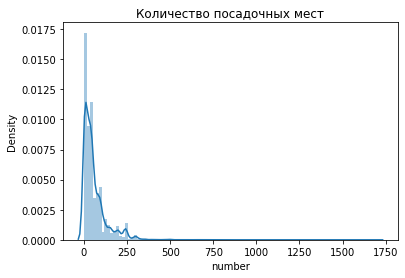

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

rest_data.info()

print(rest_data.duplicated().sum())

rest_data['object_name'] = rest_data['object_name'].str.lower()


display(rest_data)
display(rest_data['object_type'].value_counts())
display(rest_data['object_name'].value_counts())
display(rest_data['number'].describe())

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
        
plt.title('Количество посадочных мест')
ax = sns.distplot(rest_data['number'], bins=100)
plt.show()

count    13042.000000
mean        66.563180
std         63.177112
min          5.000000
25%         24.000000
50%         45.000000
75%         89.000000
max        343.000000
Name: number, dtype: float64

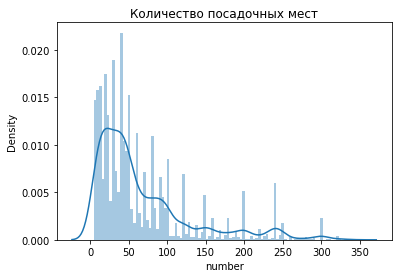

In [3]:
rest_data = rest_data.query('number >= 5 and number < 350')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

display(rest_data['number'].describe())
plt.title('Количество посадочных мест')
ax = sns.distplot(rest_data['number'], bins=100)
plt.show()

Вывод:


1. Пропусков в данных нет

2. Дубликатов в данных нет

3. Типы данных правильные

4. В колонке object_name названия привели к единому регистру

5. Данные готовы к анализу.

## Анализ данных

### Виды объектов питания

,вид,количество
0,кафе,5530
1,столовая,2455
2,ресторан,2168
3,предприятие быстрого обслуживания,970
4,бар,790
5,буфет,499
6,кафетерий,205
7,закусочная,127
8,магазин (отдел кулинарии),84


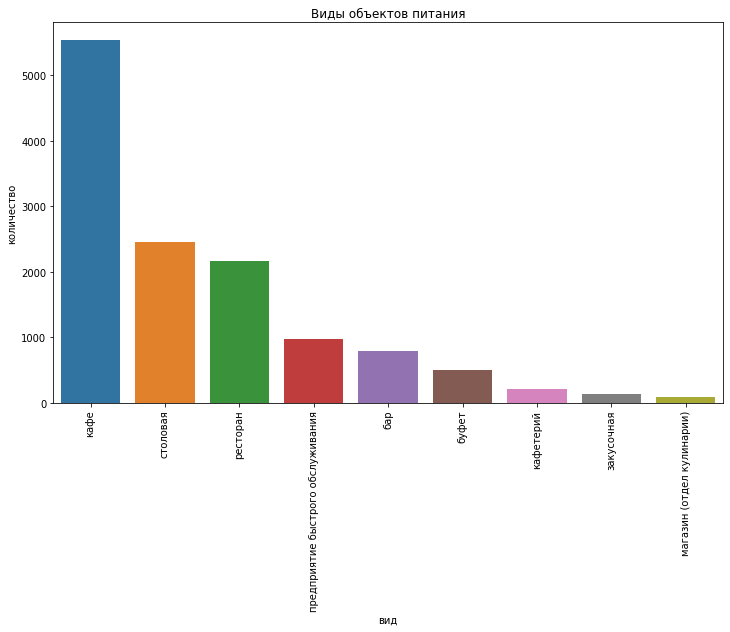

In [20]:
type = rest_data['object_type'].value_counts().reset_index()
type.columns = ['вид', 'количество']
display(type)

plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
plt.title('Виды объектов питания')
ax = sns.barplot(x='вид', y='количество', data=type)



Однозначный лидер по колличеству объектов являются кафе. Далее идут столовые, рестораны и предприятия быстого питания.

### Сетевые и не сетевые объекты питания 

,сети,количество
0,нет,10281
1,да,2547


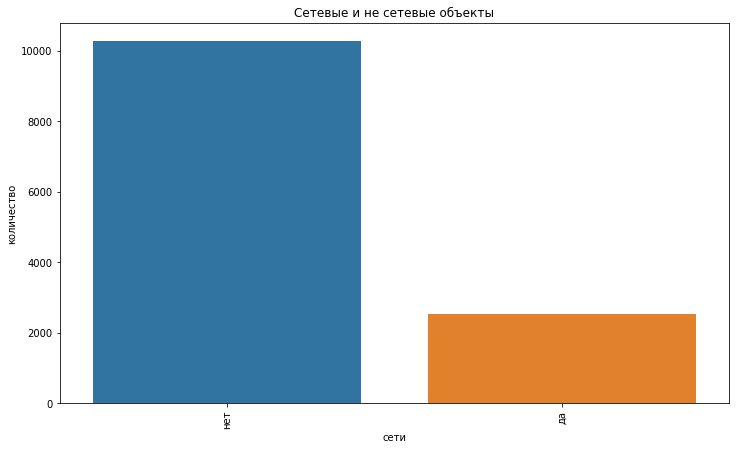

In [21]:
networks = rest_data['chain'].value_counts().reset_index()
networks.columns = ['сети', 'количество']
display(networks)

plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
plt.title('Сетевые и не сетевые объекты')
ax = sns.barplot(x='сети', y='количество', data=networks)



Не сетевых объектов питания в разы больше.

### Сетевые объекты питания

,id,object_name,chain,object_type,address,number,street
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,улица Авиаторов
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,Азовская улица
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,Большая Академическая улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


,вид,количество,доля%
1,предприятие быстрого обслуживания,606,24.68
2,ресторан,511,23.57
0,кафе,1295,23.42
6,кафетерий,30,14.63
5,закусочная,31,6.21
4,бар,33,4.18
3,магазин (отдел кулинарии),35,3.61
8,столовая,3,3.57
7,буфет,3,2.36


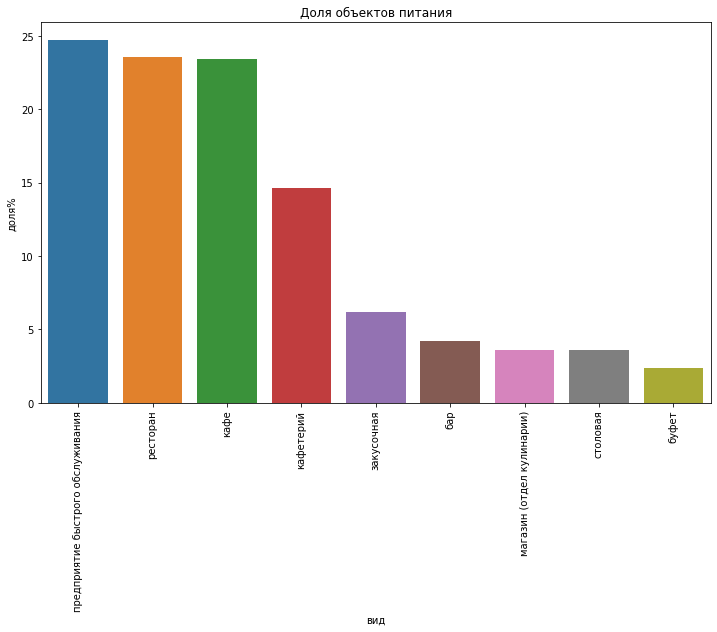

In [22]:
networks_rest = rest_data.query('chain == "да"')
networks_type = networks_rest['object_type'].value_counts().reset_index()
networks_type.columns = ['вид', 'количество']

networks_type['доля%'] = ((networks_type['количество'] / type['количество']) * 100).round(2)

display(networks_rest)
networks_type = networks_type.sort_values(by='доля%', ascending=False)
display(networks_type)

plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
plt.title('Доля объектов питания')
ax = sns.barplot(x='вид', y='доля%', data=networks_type)



<div class="alert alert-info">  По доле от общего количества в сетях лидирует предприятия быстрого обслуживания. На втором месте рестораны, а кафе только третье место.

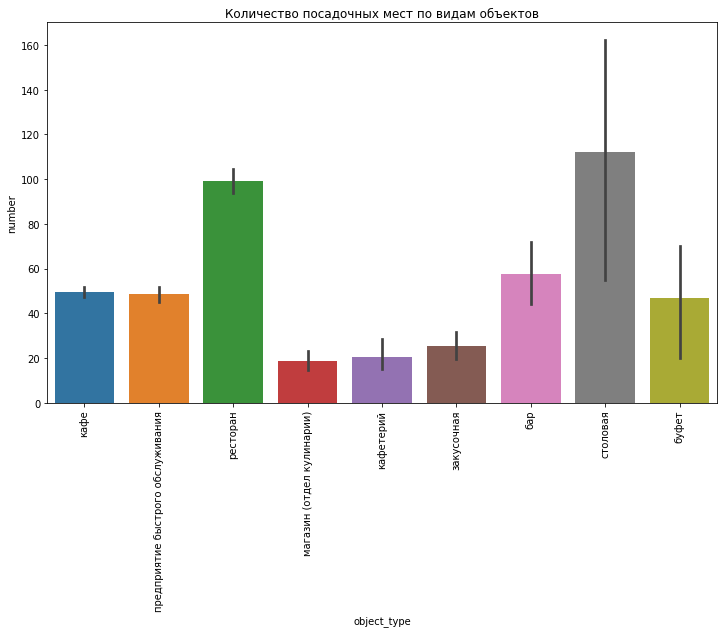

In [7]:
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
plt.title('Количество посадочных мест по видам объектов')
ax = sns.barplot(x='object_type', y='number', data=networks_rest)


Для сетевых объектов питания характерно большее количество заведений с не большим количеством посадочных мест.

### Виды заведений по среднему количеству посадочных мест

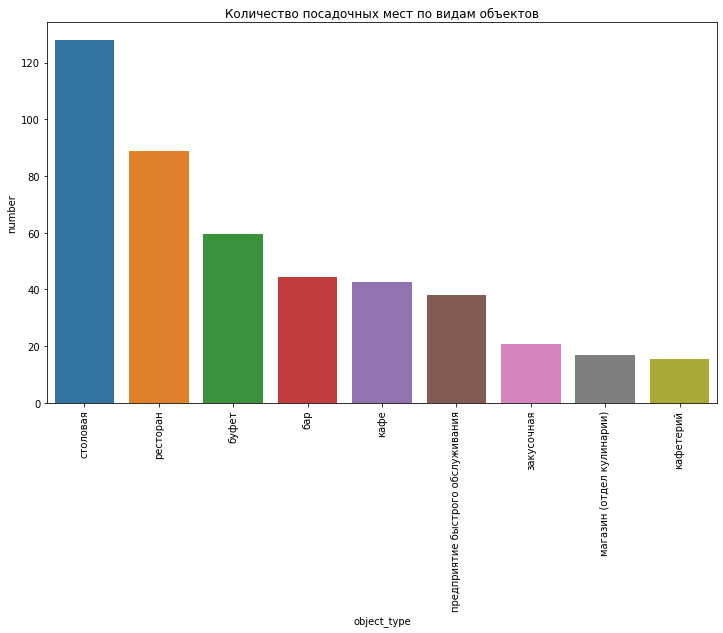

In [8]:
number = rest_data.groupby('object_type')['number'].mean().reset_index().sort_values(by='number', ascending=False)
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
plt.title('Количество посадочных мест по видам объектов')
ax = sns.barplot(x='object_type', y='number', data=number )

По среднему количесву посадочных мест однозначный лидер это столовые. На втором месте рестораны, дальше идут буфеты, бары и кафе.

### Исследовагие адресного расположения

Адреса делю на отдельные столбцы

In [9]:
rest_address = rest_data['address'].str.split(',', expand=True)
rest_address

,0,1,2,3,4,5,6
0,город Москва,улица Егора Абакумова,дом 9,None,None,None,None
1,город Москва,улица Талалихина,дом 2/1,корпус 1,None,None,None
2,город Москва,Абельмановская улица,дом 6,None,None,None,None
3,город Москва,Абрамцевская улица,дом 1,None,None,None,None
4,город Москва,Абрамцевская улица,дом 9,корпус 1,None,None,None
...,...,...,...,...,...,...,...
15361,город Москва,3-й Крутицкий переулок,дом 18,None,None,None,None
15362,город Москва,улица Земляной Вал,дом 33,None,None,None,None
15363,город Москва,улица Земляной Вал,дом 33,None,None,None,None
15364,город Москва,поселение Московский,Киевское шоссе,22-й километр,домовладение 4,строение 1,None


Добавляю в таблицу отдельный стобец с улицами

In [10]:
rest_data['street'] = rest_address[1]
rest_data['street'] = rest_data['street'].str.strip()
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


### Топ 10 улиц по количеству заведений питания

,улица,количество
0,проспект Мира,189
1,Ленинградский проспект,147
2,Пресненская набережная,139
3,Профсоюзная улица,137
4,Ленинский проспект,131
5,Варшавское шоссе,127
6,проспект Вернадского,119
7,поселение Сосенское,106
8,Кутузовский проспект,95
9,Дмитровское шоссе,90


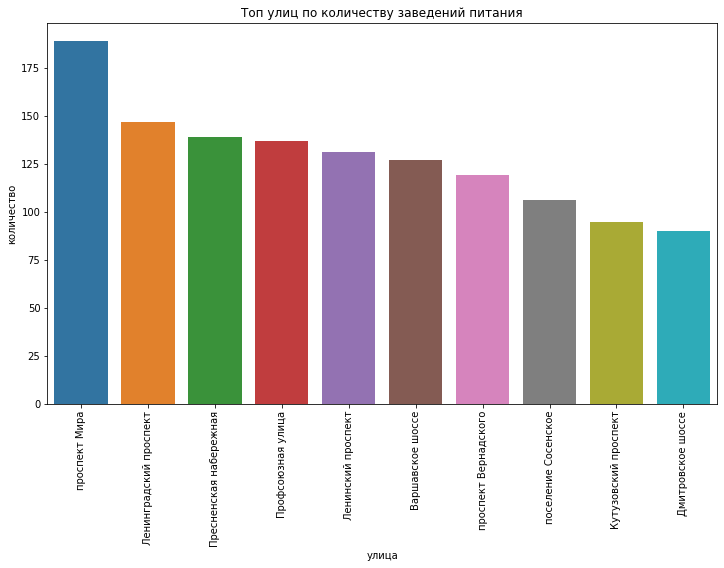

In [23]:
rest_data = rest_data.query('street != "город Зеленоград"')

street = rest_data['street'].value_counts().reset_index()
street.columns = ['улица', 'количество']
top_street = street.head(10)
display(top_street)

plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
plt.title('Топ улиц по количеству заведений питания')
ax = sns.barplot(x='улица', y='количество', data=top_street)


### Районы в которых распологаются топ 10 улиц

Загружаем данные о районах Москвы из внешнего источника

In [12]:
area = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv')
area.columns = ['улица', 'areaid', 'округ', 'район']
area

,улица,areaid,округ,район
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [13]:
top_area = top_street.merge(area, on='улица', how='left')
display(top_area)
top_area['округ'].value_counts()

,улица,количество,areaid,округ,район
0,проспект Мира,189,70.0,СВАО,Алексеевский район
1,проспект Мира,189,86.0,СВАО,Ярославский Район
2,проспект Мира,189,78.0,СВАО,Район Марьина роща
3,проспект Мира,189,79.0,СВАО,Останкинский район
4,проспект Мира,189,81.0,СВАО,Район Ростокино
5,проспект Мира,189,82.0,СВАО,Район Свиблово
6,проспект Мира,189,16.0,ЦАО,Мещанский район
7,Ленинградский проспект,147,54.0,САО,Район Аэропорт
8,Ленинградский проспект,147,55.0,САО,Район Беговой
9,Ленинградский проспект,147,69.0,САО,Хорошевский район


ЮЗАО    14
САО      9
СВАО     8
ЮАО      7
ЗАО      7
ЦАО      3
Name: округ, dtype: int64

 Больше улиц с большим количесвом заведений питания находится в Юго-Западном, Западном и  Южном административных округах.

### Улицы с одним заведением питания

In [14]:
street_one = street.query('количество == 1')
street_one

,улица,количество
1262,Малый Лёвшинский переулок,1
1263,владение 99А,1
1264,Канатчиковский проезд,1
1265,Мартеновская улица,1
1266,1-я Гражданская улица,1
...,...,...
1853,78-й километр Московской Кольцевой Автодороги,1
1854,Таганрогская улица,1
1855,Успенский переулок,1
1856,Международная улица,1


### Районы с улицами по одному заведению питания

In [15]:
street_one_area = street_one.merge(area, on='улица', how ='left')
display(street_one_area)
street_one_area['округ'].value_counts()

,улица,количество,areaid,округ,район
0,Малый Лёвшинский переулок,1,20.0,ЦАО,Район Хамовники
1,владение 99А,1,NaN,NaN,NaN
2,Канатчиковский проезд,1,99.0,ЮАО,Донской район
3,Мартеновская улица,1,31.0,ВАО,Район Новогиреево
4,Мартеновская улица,1,32.0,ВАО,Район Перово
...,...,...,...,...,...
638,78-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
639,Таганрогская улица,1,115.0,ЮВАО,Район Люблино
640,Успенский переулок,1,19.0,ЦАО,Тверской район
641,Международная улица,1,18.0,ЦАО,Таганский район


ЦАО           189
ВАО            74
СВАО           69
САО            62
ЮВАО           57
ЗАО            44
ЮАО            32
ЮЗАО           29
СЗАО           28
Зеленоград      1
Name: округ, dtype: int64

Абсолютный лидер это Центральный административный округ. Так же много в Восточном и Северо-Восточном адмистративных округах.

### Изучение количества посадочных мест на улицах с большим количеством заведений

In [16]:
street_top = ['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Пресненская набережная', 'Варшавское шоссе', 'Ленинский проспект', 'поселение Сосенское', 'проспект Вернадского', 'Кутузовский проспект', 'Каширское шоссе']

filtr_street = rest_data['street'].isin(street_top)

street_number = rest_data[filtr_street]

street_number

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
156,26279,ресторан «макдоналдс»,да,кафе,"город Москва, Варшавское шоссе, дом 143А",70,Варшавское шоссе
165,141687,пироговая рогова,нет,кафе,"город Москва, проспект Вернадского, дом 9/10",42,проспект Вернадского
...,...,...,...,...,...,...,...
15260,211703,милти,да,кафе,"город Москва, Пресненская набережная, дом 4, с...",10,Пресненская набережная
15308,213629,додо пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15347,222491,кальянная «мята lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15350,213061,мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


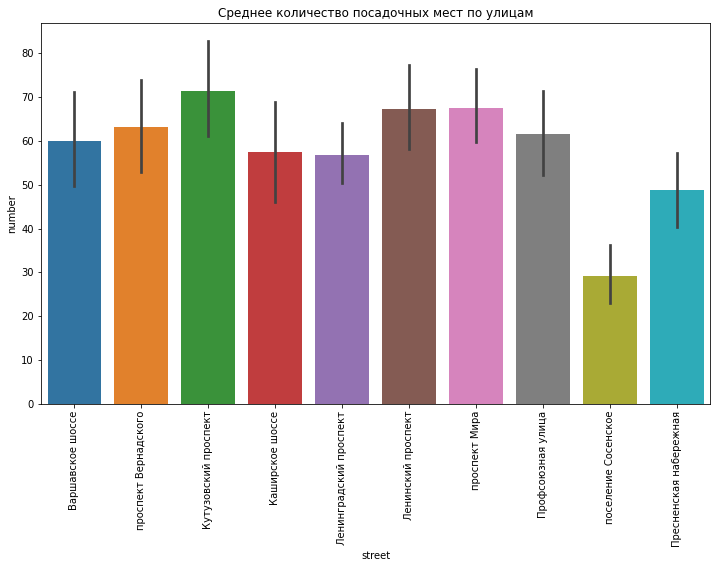

In [17]:
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
plt.title('Среднее количество посадочных мест по улицам')
ax = sns.barplot(x='street', y='number', data=street_number )

In [18]:
top_street_number = street_number.groupby('street')['number'].mean().reset_index()
top_street_number.columns = ['улица', 'number']
display(top_street_number)
top_numbe = top_street_number.merge(top_street).sort_values(by='количество', ascending=False)
top_numbe

,улица,number
0,Варшавское шоссе,59.897638
1,Каширское шоссе,57.539326
2,Кутузовский проспект,71.515789
3,Ленинградский проспект,56.884354
4,Ленинский проспект,67.312977
5,Пресненская набережная,48.733813
6,Профсоюзная улица,61.525547
7,поселение Сосенское,29.207547
8,проспект Вернадского,63.302521
9,проспект Мира,67.608466


,улица,number,количество
8,проспект Мира,67.608466,189
2,Ленинградский проспект,56.884354,147
4,Пресненская набережная,48.733813,139
5,Профсоюзная улица,61.525547,137
3,Ленинский проспект,67.312977,131
0,Варшавское шоссе,59.897638,127
7,проспект Вернадского,63.302521,119
6,поселение Сосенское,29.207547,106
1,Кутузовский проспект,71.515789,95


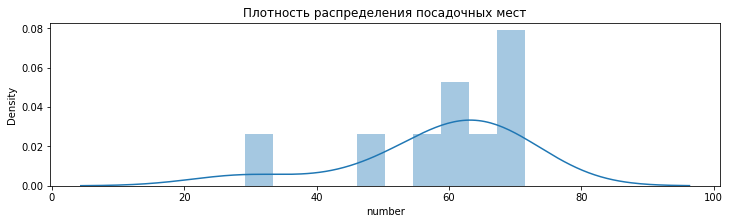

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
plt.figure(figsize=(12, 3))
ax = sns.distplot(top_numbe['number'], bins=10)
plt.title('Плотность распределения посадочных мест')
plt.show()

От количества заведений на улице количество посадочных мест не имеет зависимости. В основном это заведения со средним количеством посадочных мест.

## Вывод:

1 Пропусков в данных нет. Дубликатов в данных нет. Типы данных правильные. В колонке object_name названия привели к единому регистру.

2 Названия по типу объектов питания корректны.

3 По названию объектов есть повторения, но у них разные адреса. А значит это разные объекты питания.

4 В данных по количеству посадочных мест обнаружились аномалии. Убрал значения меньше 5 посадочных мест и больше 350.

5 По виду заведений однозначно лидирует "кафе".

6 Не сетевых объектов почти в 5 раз больше.

7 По доле от общего количества в сетях лидирует предприятия быстрого обслуживания. На втором месте рестораны, а кафе только третье место.

8 Для сетевых объектов питания характерно большее количество заведений с не большим количеством посадочных мест.

9 В основном приобладают заведения со средним числом посадочных мест. Исключение составляют столовые и рестораны. Там количество посадочных мест намного выше среднего.

10  Больше улиц с большим количесвом заведений питания находится в Юго-Западном, Западном и  Южном административных округах.

11 На улицах с большим количеством объектов питания скорее всего имеет место высоая проходимость клиентов. Это культурные и деловые центры.

12 Улицы с очень маленьким количеством заведений находятся в Центральном, Восточном и еверо-Восточном административных округах.

13 Заведения на улицах с большим количесвом объектов питанитя имеют среднее количество посадочных мест.



## Рекомендации:


Считаю, что целесообразно начинать развивать сеть кафе или пунктов быстрого питания в Центральном, Восточном и Северо-Восточном округах, с малым и среднем количеством посадочных мест.

## Презентация :  https://disk.yandex.ru/i/gbUVgd6HLAIO1w